In [41]:
import cv2
import sqlite3
from matplotlib import pyplot as plt
import numpy as np

from visualize_model import Model
from database import blob_to_array, pair_id_to_image_ids

# 2. Analyze reconstructions using python
## 2.1. Run the notebook, using the Gerrard Hall reconstruction (0.5)
#### <span style='color:Green'> - Add the path to your reconstruction. Answer the questions at the end  </span>

In [89]:
# Add your path
# Get the path of the current notebook
import os
current_path = os.getcwd()
# Cut the current path until the folder "M4_Project"
current_path = current_path[:current_path.find("M4_Project")]
current_path

'/Users/guillemcapellerafont/Documents/Master/M4-3DVision/Projecte/'

In [90]:

reconstruction_path = current_path + "ReconstructionAnna/gerrard-hall/dense/0/sparse"
database_path = current_path + "reconstruction/database.db"
print(reconstruction_path)
print(database_path)

/Users/guillemcapellerafont/Documents/Master/M4-3DVision/Projecte/ReconstructionAnna/gerrard-hall/dense/0/sparse
/Users/guillemcapellerafont/Documents/Master/M4-3DVision/Projecte/reconstruction/database.db


#### Load an existing reconstruction and print its contents

In [92]:
model = Model()
model.read_model(reconstruction_path, ext='.bin') # Should also work with .txt

In [93]:
images = model.images
cameras = model.cameras
points3D = model.points3D

In [95]:
print(f"Loaded {len(images)} images. This is the information available for one of them:")
print(images[1])
print(f"\nLoaded {len(cameras)} cameras. This is the information available for one of them:")
print(cameras[1])
print(f"\nLoaded {len(points3D)} 3D points. This is the information available for one of them:")
print(points3D[1])

Loaded 100 images. This is the information available for one of them:
Image(id=1, qvec=array([ 0.63711573,  0.22454511, -0.25393203,  0.69222942]), tvec=array([-0.72159399, -1.96586695,  2.73697933]), camera_id=1, name='IMG_2387.JPG', xys=array([[ 215.20703474,    9.34729273],
       [ 785.83763929,    2.99797487],
       [ 790.8341331 ,    9.49774243],
       ...,
       [ 534.08214366, 1016.27616386],
       [ 684.9938514 , 1011.77949933],
       [ 684.9938514 , 1011.77949933]]), point3D_ids=array([-1, -1, -1, ..., -1, -1, -1]))

Loaded 1 cameras. This is the information available for one of them:
Camera(id=1, model='PINHOLE', width=1600, height=1052, params=array([1054.24524185, 1054.2247966 ,  800.        ,  526.        ]))

Loaded 42833 3D points. This is the information available for one of them:
Point3D(id=1, xyz=array([-0.02895333, -1.54922488, -1.5828696 ]), rgb=array([205, 210, 213]), error=array(0.39563032), image_ids=array([27, 70, 63,  3]), point2D_idxs=array([  27, 2421, 

#### Load the database

In [96]:
db = sqlite3.connect(database_path)

In [97]:
keypoints = dict(
        (image_id, blob_to_array(data, np.float32, (-1, 2)))
        for image_id, data in db.execute(
            "SELECT image_id, data FROM keypoints"))

In [99]:
print(f"Loaded keypoints from {len(keypoints)} images. These are the {len(keypoints[1])} keypoints for one of them:")
print(keypoints[1])

Loaded keypoints from 100 images. These are the 26670 keypoints for one of them:
[[ 1.6399910e+03  8.5162611e+00]
 [-5.2456260e+00  8.9243376e-01]
 [-8.9154136e-01 -5.2508769e+00]
 ...
 [ 2.7625830e+03  3.2816367e+03]
 [ 5.9274681e+01  2.7838610e+01]
 [-2.7810772e+01  5.9334015e+01]]


In [100]:
matches = dict()
count_no_data = 0
for pair_id, data in db.execute("SELECT pair_id, data FROM matches"):
    if data is None:
        count_no_data += 1
    else:
        matches[pair_id_to_image_ids(pair_id)] = blob_to_array(data, np.uint32, (-1, 2))
print(f"Loaded {len(matches)} matches. {count_no_data}/{len(matches)+count_no_data} matches contained no data")

Loaded 4275 matches. 675/4950 matches contained no data


In [101]:
print("These are the matches between two images:")
print(matches[1,2])

These are the matches between two images:
[[ 223   25]
 [ 235   30]
 [ 236   31]
 ...
 [8887 9024]
 [8869 9027]
 [8872 9029]]


#### Visualize the point cloud and cameras

In [ ]:
model.create_window()
model.add_points()
model.add_cameras(scale=0.25)
model.show()

#### <span style='color:Green'>  How many keypoints there are in total? </span> 

In [103]:
sum=0
for i in range(len(keypoints)):
    sum += len(keypoints[i+1])

print(f"Total number of keypoints: {sum}")

Total number of keypoints: 2955591


#### <span style='color:Green'>  How many 3D points originated from a keypoint in the first image? </span>


In [88]:
# # Compute the number of 3D points originated from a keypoint in the first image
# # Take the first kp in the first image
# idx = 1
# print(keypoints[idx][0])
# # Find the matches of this kp with the second image

# index = []
# for i in range(2,100):
#     try:
#         # Get the index of the array matches[idx,i] where the value in the first column is equal to idx
#         index.append([i, list(matches[idx,i][:][0]).index(idx)])
#     except:
#         continue
#     # if matches[1,i] == 1:
#     #     print(matches[1,i][0])

# matches[idx,2][:][0]
# # np.where(matches[1,2][0] == 1)

img_idx = 1
kp_idx = 1

print(len(images))
print(len(keypoints))

print(len(keypoints[img_idx]))

# Print the kp of the first image in a .txt file
with open("keypoints.txt", "w") as f:
    for i in range(len(keypoints[img_idx])):
        f.write(f"{keypoints[img_idx][i][0]} {keypoints[img_idx][i][1]}\n")

# Print the xys of the first image in a .txt file
with open("xys.txt", "w") as f:
    for i in range(len(images[img_idx].xys)):
        f.write(f"{images[img_idx].xys[i][0]} {images[img_idx].xys[i][1]}\n")

# img_kp_idx = []
# for i in range(len(images)):
#     if len(keypoints[img_idx]) == len(images[i+1].xys):
#         img_kp_idx.append(i+1)
    
# print(img_kp_idx)

# print(images[img_idx])
# print(keypoints[1])

# print(f"First keypoint of the first image: {keypoints[1][0]}")
# # Search if we can find this kp in the xys points of the first image to know the index
# print(f"Index of the first keypoint of the first image: {np.where(images[1].xys == keypoints[1][0])}")



100
100
26670


## 2.2 Plot the 3D points coloured according to the number of images and error. (0.5)

#### <span style='color:Green'> - Plot the 3D points coloured according to the **number of images** from which it originated. </span> Can you extract any conclusions from the visualization? 

(41327, 3)
(41327,)


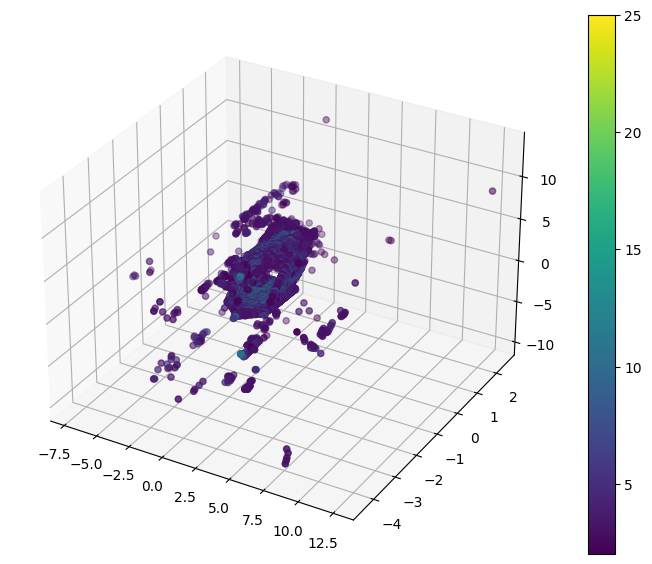

In [104]:
### TO DO 2.2
def draw_points(points, color, ax=None, **plot_kwargs):
    # Creating figure
    
    fig = plt.figure(figsize=(10, 7))
    ax = plt.axes(projection="3d")
    # Creating 3D scatter plot with num_images as intensity of color
    # alpha = num_images / np.max(num_images)
    # ax.scatter3D(points[:, 0], points[:, 1], points[:, 2], c=color, alpha=alpha, **plot_kwargs)
    p = ax.scatter3D(points[:, 0], points[:, 1], points[:, 2], c=color, **plot_kwargs)
    fig.colorbar(p)



points3D_xyz = []
num_images = []
error = []
rgb = []
for i in range(len(points3D)): 
    try:
        points3D_xyz.append(points3D[i+1].xyz)
        num_images.append(len(points3D[i+1].image_ids))
        error.append(points3D[i+1].error)
        rgb.append(points3D[i+1].rgb)
    except:
        continue

points3D_xyz = np.array(points3D_xyz)
num_images = np.array(num_images)
error = np.array(error)
rgb = np.array(rgb)/255

print(points3D_xyz.shape)
print(num_images.shape)

draw_points(points3D_xyz, color=num_images, ax=None)



#### <span style='color:Green'> - Plot the 3D points coloured according to the **error**. </span> - What is this parameter? Can you extract any conclusions from the visualization?

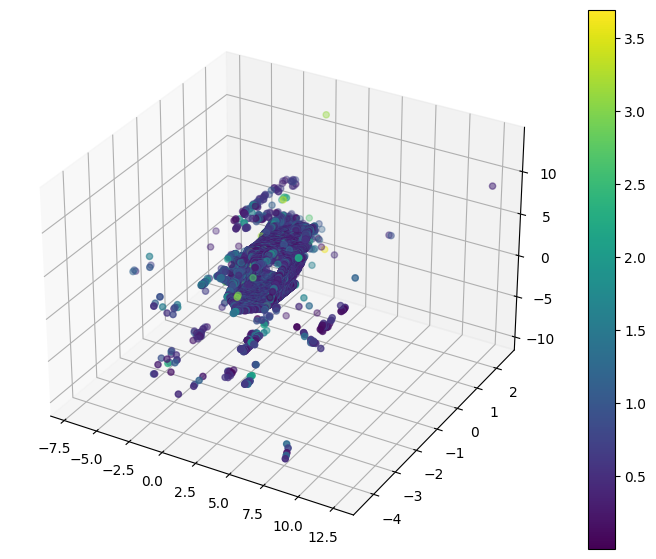

In [105]:
### TO DO 2.2
draw_points(points3D_xyz, color=error, ax=None)

## 2.3 Plot the 3D points that correspond to a keypoint in the first image. Also plot the image with the keypoints (1.0)


In [ ]:
### TO DO 2.3



## 2.4 Create a visualization for the number of matches between all images. (1.0)
For example: https://seaborn.pydata.org/generated/seaborn.heatmap.html

In [ ]:
### TO DO 2.4

## 2.5 Visualize the keypoints and matches between the two images used in lab 4 using Colmap, how it compares to the results from lab 4? (1.0)
#### <span style='color:Green'> You can use the GUI to get the keypoints and matches and then visualize it here, following the same style as in lab 4 to get comparable results. </span>

In [ ]:
### TO DO 2.5

## 2.6 Triangulate and visualize the 3D points from the keypoints extracted using Colmap on the two images used in lab 4, how it compares to the results from lab 4? (1.0) 
#### <span style='color:Green'> - Use the triangulation from lab 4 to the get the 3D points and visualize them following the same style. </span>

In [ ]:
### TO DO 2.6

## 2.7 Visualize the sparse reconstruction using the 2 images from lab 4, and the complete CASTLE dataset. Comment on the differences between techniques and number of images used. (1.0)
#### <span style='color:Green'> - Use the reconstruction from Colmap to the get the 3D points and visualize them following the same style, using two images and the complete dataset. </span>

In [ ]:
### TO DO 2.7